In [1]:
#!pip3 install qiskit
#!pip3 install pylatexenc

In [2]:
from qiskit import *
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import rv_continuous

In [3]:
class PQC:
    def __init__(self,name):
        self.backend = Aer.get_backend('statevector_simulator');
        self.circ = QuantumCircuit(1);
        self.name = name;
        if self.name=="rz":
            self.circ.h(0);
        if self.name=="rzx":
            self.circ.h(0);
    def add(self):
        if self.name == "rz":
            th = np.random.uniform(0,2*np.pi);
            self.circ.rz(th,0);
        if self.name == "rzx":
            th1 = np.random.uniform(0,2*np.pi);
            self.circ.rz(th1,0);
            th2 = np.random.uniform(0,2*np.pi);
            self.circ.rx(th2,0);
    def remove(self):
        if self.name == "rz":
            self.circ.data.pop(1);
        if self.name == "rzx":
            self.circ.data.pop(1);
            self.circ.data.pop(1);
    def get(self):
        self.add();
        result = execute(self.circ,self.backend).result();
        out_state = result.get_statevector();
        self.remove(); # remove a random gate
        return np.asmatrix(out_state).T;

    def draw(self):
        th = np.random.uniform(0,2*np.pi);
        self.circ.rz(th,0);
        self.circ.draw('mpl'); # 왜 안 그려지는지 모르겠습니다
        self.circ.data.pop(1);
        

In [4]:
pqc = PQC("rzx");

In [5]:
pqc.get()

matrix([[0.66700744-0.29094501j],
        [0.64447731+0.23473619j]])

In [6]:
def Haar(F,N):
    if F<0 or F>1:
        return 0;
    return (N-1)*(1-F)**(N-2);
class Haar_dist(rv_continuous):
    def _pdf(self,x):
        return Haar(x,1*2);

def kl_divergence(p, q):
    return np.mean(p*np.log(p/q));
    #return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [7]:
len = 1000;
arr = [];
for i in range(len):
    fid = np.abs(pqc.get().getH()*pqc.get())**2;
    arr.append(fid[0,0]);
haar = [];
h = Haar_dist(a=0,b=1,name="haar");
for i in range(len):   
    haar.append(h.ppf((i+0.5)/len))

(array([23., 16., 12.,  9., 10.,  9.,  9., 11.,  9., 13., 13., 11.,  5.,
        13.,  6.,  7.,  8., 13., 14.,  7., 14.,  6., 10.,  8.,  6.,  9.,
         7.,  9.,  8.,  5., 12., 11., 11.,  7., 14.,  4.,  7.,  2.,  9.,
         4.,  9., 10.,  7., 12., 11., 10.,  8.,  9.,  6.,  8., 11.,  9.,
        12., 12.,  4.,  5.,  6., 10., 14.,  9., 11., 15., 11.,  7., 10.,
        11., 11., 10.,  9.,  4., 13.,  8.,  7.,  9., 12., 11.,  6., 10.,
         7., 10.,  8., 13.,  5.,  9., 10., 11., 16.,  6.,  6., 11., 15.,
        16., 14., 15., 12., 13., 19., 14., 10., 22.]),
 array([3.58585045e-05, 1.00223923e-02, 2.00089260e-02, 2.99954598e-02,
        3.99819935e-02, 4.99685273e-02, 5.99550610e-02, 6.99415948e-02,
        7.99281286e-02, 8.99146623e-02, 9.99011961e-02, 1.09887730e-01,
        1.19874264e-01, 1.29860797e-01, 1.39847331e-01, 1.49833865e-01,
        1.59820399e-01, 1.69806932e-01, 1.79793466e-01, 1.89780000e-01,
        1.99766534e-01, 2.09753067e-01, 2.19739601e-01, 2.29726135e-01,
  

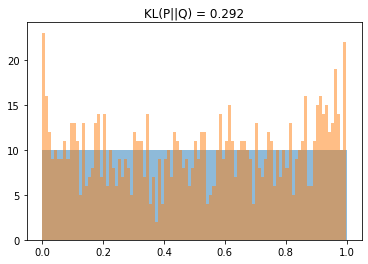

In [8]:
plt.title('KL(P||Q) = %1.3f' % kl_divergence(np.array(arr), np.array(haar)))
n_bins = 100;
# We can set the number of bins with the `bins` kwarg
# haar = np.linspace(0,1,len,endpoint=False); #true value
plt.hist(np.array(haar), bins=n_bins, alpha=0.5)
plt.hist(np.array(arr), bins=n_bins, alpha=0.5)